<a href="https://colab.research.google.com/github/Bimal-Kumar-002/Handwritten-Digit-Recognition-with-CNN-in-python/blob/master/handwritten_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>MNIST Classification using CNNs</h1>
<h2> Hand written Digit classification using CNN</h2>

In [1]:
import keras
from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


<h3>Download train and test sets of  MNIST dataset</h3>

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


<h4>Visualizing the dataset</h4>

In [3]:
def visualizing(x_test,dataset_name= "X_text"):
    %matplotlib inline

    import matplotlib.pyplot as plt
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    plt.suptitle('visulization of '+ str(dataset_name) + " dataset", fontsize=30)
    columns = 10
    rows = 10
    for i in range(1, columns*rows +1):
        img = x_test[i]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img, cmap='gray')
    plt.show()

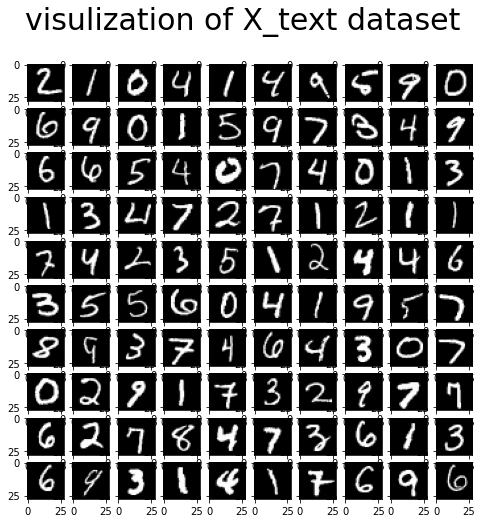

In [4]:
visualizing(x_test,dataset_name= "X_text")

<h3>Reshape train and test sets into shapes compatible with keras models</h3>
<h4>Keras expects data to be in the format (N_E.N_H,N_W,N_C)  : </h4> 
<h4> N_E = Number of Examples</h4>
<h4>N_H = height, N_W = Width, </h4> 
<h4>N_C = Number of Channels.</h4>


In [5]:
img_rows, img_cols = 28, 28
def data_formate(img_rows, img_cols,x_train, y_train,x_test, y_test):
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    return x_train,x_test,input_shape

In [6]:
x_train,x_test,input_shape=data_formate(img_rows, img_cols,x_train, y_train,x_test, y_test)

In [7]:
def Pre_processing(x_train,x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    #Normalizing the input
    x_train /= 255.0
    x_test /= 255.0
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    return x_train,x_test

In [8]:
x_train,x_test=Pre_processing(x_train,x_test)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


<h4>Convert Labels from digits to one hot vectors</h4>

In [9]:
# convert class vectors to binary class matrices
batch_size = 128
num_classes = 10
epochs = 50
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the CNN 

In [11]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax'))

<h4>Setting Optimizer and Loss function for training</h4>

In [12]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

#  Training the CNN 

In [13]:
#Import tensorboard callback which will passed in model.fit function.
from keras.callbacks import TensorBoard
from time import time


#Setting the directory to store the logs.
tensorboard = TensorBoard(log_dir=".logs\{}".format(time()))

<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('mnist_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

# Fit the model to the dataset

In [15]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard,early_stopping,model_checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 128s 2ms/step - loss: 0.2293 - accuracy: 0.9298 - val_loss: 0.0576 - val_accuracy: 0.9809

Epoch 00001: val_loss improved from inf to 0.05760, saving model to mnist_cnn_checkpoint_01_loss0.0576.h5
Epoch 2/50
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0803 - accuracy: 0.9757 - val_loss: 0.0376 - val_accuracy: 0.9865

Epoch 00002: val_loss improved from 0.05760 to 0.03761, saving model to mnist_cnn_checkpoint_02_loss0.0376.h5
Epoch 3/50
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.0344 - val_accuracy: 0.9885

Epoch 00003: val_loss improved from 0.03761 to 0.03436, saving model to mnist_cnn_checkpoint_03_loss0.0344.h5
Epoch 4/50
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.0333 - val_accuracy: 0.9892

Epoch 00004: val_loss improv

<h4>Evaluate trained model on the test set</h4>

10000/10000 [==============================] - 6s 580us/step
Test loss =  0.030:
Test accuracy 0.993:


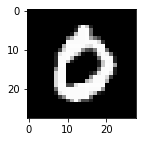

0


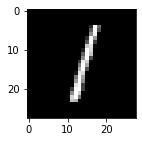

1


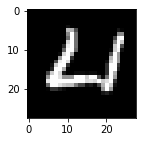

4


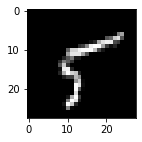

5


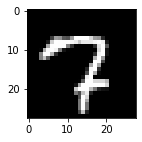

7


In [32]:
score = model.evaluate(x_test, y_test)
print('Test loss =  {:0.3f}:'.format(score[0]))
print('Test accuracy {:0.3f}:'.format(score[1]))

import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[36].reshape(1,28,28,1))))